# Saltelli's example (1.3)

In [85]:
from matplotlib import pyplot
import pandas
from scipy import stats

import sensitivity_analysis


def model_full(Z_0, Z_1, Z_2, Z_3, Ω_0, Ω_1, Ω_2, Ω_3):
    return (Ω_0 * Z_0 + Ω_1 * Z_1 + Ω_2 * Z_2 + Ω_3 * Z_3)


def model_simple(Z_0, Z_1, Z_2, Z_3, Ω=2):
    return model_full(Z_0, Z_1, Z_2, Z_3, Ω, Ω, Ω, Ω)


Z = {f'Z_{i}': stats.norm(0, i + 1)
     for i in range(4)}
Ω = {f'Ω_{i}': stats.norm((i + 1) * 0.5, i + 1) 
     for i in range(4)}
parameters_simple = Z
parameters_full = dict(**Z, **Ω)

## Figure 1.6

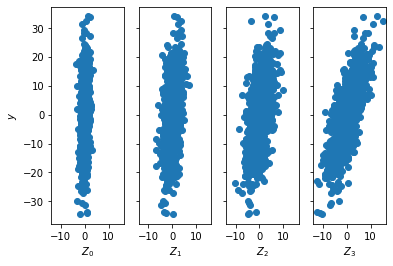

In [86]:
n_samples = 1000
X = sensitivity_analysis.sampling.get_unstructured(parameters_simple, n_samples)
y = model_simple(**X)

(fig, axes) = pyplot.subplots(1, len(parameters_simple), sharex=True, sharey=True)
for (i, ax) in zip(parameters_simple.keys(), axes):
    ax.scatter(X[i], y)
    ax.set_xlabel(f'${i}$')
_ = axes[0].set_ylabel(f'$y$')

## Tables 1.1 & 1.2

In [115]:
def bold_sum(s):
    '''Made the 'Sum' row bold.'''
    is_sum = (s.index == 'Sum')
    return ['font-weight: bold' if v else '' for v in is_sum]


def display_with_sums(table):
    '''Add column sums and display.'''
    table = table.copy()
    table.loc['Sum'] = table.sum()
    return table.style.apply(bold_sum)
    

def get_all_sensitivities(model, parameters, n_samples):
    '''Run all of the sensitivity methods.'''
    table = {}
    sensitivity = sensitivity_analysis.local.get_sensitivity(
        model, parameters)
    table[r'$S^2$'] = sensitivity ** 2
    beta = sensitivity_analysis.linear_regression.get_coefficients(
        model, parameters, n_samples)
    table[r'$\beta^2$'] = beta ** 2
    table[r'$\nu$'] = sensitivity_analysis.dgsm.get_DGSM(
        model, parameters, n_samples)
    sensitivity_sigma = sensitivity_analysis.local.get_sensitivity_sigma_normalized(
        model, parameters, n_samples)
    table[r'$S_{\sigma}^2$'] = sensitivity_sigma ** 2
    beta_sigma = sensitivity_analysis.linear_regression.get_coefficients_standardized(
        model, parameters, n_samples)
    table[r'$\beta_{\sigma}^2$'] = beta_sigma ** 2
    (S, _, S_T, _) = sensitivity_analysis.sobol_index.get_indexes(
        model, parameters, n_samples)
    table[r'$S$'] = S
    table[r'$S_T$'] = S_T
    table[r'$\nu_{\sigma}$'] = sensitivity_analysis.dgsm.get_DGSM_sigma_normalized(
        model, parameters, n_samples)
    rho_PR = sensitivity_analysis.prcc.get(
        model, parameters, n_samples)
    table[r'$\rho_{\text{rank, partial}}^2$'] = rho_PR ** 2
    return pandas.DataFrame(table)


n_samples = 1000
table = get_all_sensitivities(model_simple, parameters_simple, n_samples)
display_with_sums(table)

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,$S^2$,$\beta^2$,$\nu$,$S_{\sigma}^2$,$\beta_{\sigma}^2$,$S$,$S_T$,$\nu_{\sigma}$,"$\rho_{\text{rank, partial}}^2$"
Z_0,4,4,4,0.0322848,0.0323747,0.0485997,0.0250516,0.0322955,0.348319
Z_1,4,4,4,0.12887,0.129272,0.135607,0.13696,0.128453,0.690825
Z_2,4,4,4,0.2888,0.291225,0.305012,0.280458,0.289574,0.83098
Z_3,4,4,4,0.514875,0.520438,0.487492,0.542091,0.514149,0.905313
Sum,16,16,16,0.96483,0.973309,0.976711,0.984561,0.964472,2.77544


In [116]:
(model, parameters) = (model_simple, parameters_simple)
# (model, parameters) = (model_full, parameters_full)
n_samples = 1000
X = sensitivity_analysis.sampling.get_Latin_hypercube(
    parameters, n_samples)
y = model(**X)

table = pandas.DataFrame({
    r'$\rho^2$': sensitivity_analysis.stats.cc(X, y) ** 2,
    r'$\rho_{\text{partial}}^2$': sensitivity_analysis.stats.pcc(X, y) ** 2,
    r'$\rho_{\text{rank}}^2$': sensitivity_analysis.stats.rcc(X, y) ** 2,
    r'$\rho_{\text{rank, partial}}^2$': sensitivity_analysis.stats.prcc(X, y) ** 2,
})
display_with_sums(table)

,$\rho^2$,$\rho_{\text{partial}}^2$,$\rho_{\text{rank}}^2$,"$\rho_{\text{rank, partial}}^2$"
Z_0,0.0408495,1,0.034935,0.331949
Z_1,0.124558,1,0.111905,0.663781
Z_2,0.305389,1,0.295139,0.825092
Z_3,0.561447,1,0.54451,0.897323
Sum,1.03224,4,0.986489,2.71814


# Saltelli's example (1.3) & (1.27)

## Tables 1.3 & 1.5

In [117]:
# n_samples = 40000
n_samples = 1000

table = get_all_sensitivities(model_full, parameters_full, n_samples)
display_with_sums(table)

,$S^2$,$\beta^2$,$\nu$,$S_{\sigma}^2$,$\beta_{\sigma}^2$,$S$,$S_T$,$\nu_{\sigma}$,"$\rho_{\text{rank, partial}}^2$"
Z_0,0.25,0.0125686,1.24804,0.000604596,8.22762e-05,0.0355129,0.00111423,0.00282122,0.000325988
Z_1,1,0.103227,4.99329,0.00967677,0.00872883,0.0354701,0.0454684,0.0450153,0.0147631
Z_2,2.25,2.09786,11.2471,0.0492506,0.0474386,0.0449721,0.204674,0.228454,0.0456179
Z_3,4,4.71561,19.929,0.154663,0.143068,0.174304,0.730023,0.719016,0.132099
Ω_0,0,0.0107438,1.00008,3.59516e-10,0.00138798,0.0312956,0.00344761,0.00225989,0.000957593
Ω_1,0,0.0934663,3.99791,1.1209e-09,0.000603505,0.0397371,0.0274517,0.0360047,0.000360333
Ω_2,0,0.0433467,9.00126,6.93006e-08,0.00213308,0.0102519,0.168807,0.182666,2.35748e-05
Ω_3,0,0.0112767,15.9836,4.50483e-09,0.00626227,-0.0252921,0.56841,0.575027,0.000604954
Sum,7.5,7.0881,67.4002,0.214195,0.209704,0.346252,1.7494,1.79126,0.194752
